In [409]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [410]:
def manual_erosion(imagem, elemento_estruturante):
    # Dimensões do elemento estruturante
    h, w = elemento_estruturante.shape
    # Dimensões da imagem
    img_h, img_w = imagem.shape
    
    # Calcular a margem para aplicar a erosão
    pad_h = h // 2
    pad_w = w // 2

    # Criar uma nova imagem para armazenar o resultado
    imagem_erodida = np.zeros(imagem.shape)

    # Percorrer cada pixel da imagem (evitando as bordas)
    for i in range(pad_h, img_h - pad_h):
        for j in range(pad_w, img_w - pad_w):
            # Extrair a região correspondente na imagem            
            region = imagem[i - pad_h:i + pad_h + 1,j - pad_w:j + pad_w + 1] 

            if (np.all(region[elemento_estruturante == 1] == 1) and (np.all(region[elemento_estruturante == 0] == 0))):
                imagem_erodida[i, j] = 1

    return imagem_erodida



def uniao(img1, img2):
    """Retorna a união de duas imagens binarizadas."""
    rows, cols = len(img1), len(img1[0])
    resultado = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            resultado[i][j] = 1 if img1[i][j] == 1 or img2[i][j] == 1 else 0
    return np.array(resultado)

def interseccao(img1, img2):
    """Retorna a interseção de duas imagens binarizadas."""
    rows, cols = len(img1), len(img1[0])
    resultado = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            resultado[i][j] = 1 if img1[i][j] == 1 and img2[i][j] == 1 else 0
    return np.array(resultado)

def complemento(img):
    """Retorna o complemento da imagem binária."""
    rows, cols = len(img), len(img[0])
    resultado = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            resultado[i][j] = 1 if img[i][j] == 0 else 0
    return np.array(resultado)

def manual_Acerto_e_Erro(imagem, elementos_estruturante):
    
    Acerto_e_Erro = np.zeros(imagem.shape)

    for elemento in elementos_estruturantes:
        Acerto_e_Erro = uniao(Acerto_e_Erro, manual_erosion(imagem, elemento))
        # Acerto_e_Erro += manual_erosion(imagem, elemento)
    
    return np.array(Acerto_e_Erro)


def manual_fecho_convexos(imagem, elementos_estruturante):

    # Criar uma nova imagem para armazenar o resultado
    fecho_convexo = np.zeros(image.shape)

    for elemento in elementos_estruturantes:

        elementos = [elemento]

        # 1. Adicionando uma coluna no início e no fim, e uma linha acima e abaixo
        antes = np.pad(image, pad_width=1, mode='constant', constant_values=0)
        
        acerto_erro = manual_Acerto_e_Erro(antes, elementos)
        X = acerto_erro + antes
        
        while not np.array_equal(antes, X):  # Verifica se 'antes' e 'X' são diferentes
            antes = X  # Atualiza 'antes' com o último estado de 'X'
            X = manual_Acerto_e_Erro(antes, elementos) + antes
        
        # 2. Removendo uma coluna no início e no fim, e uma linha acima e abaixo
        imagem_finalizada = X[1:-1, 1:-1]
        
        resultado  = uniao(fecho_convexo, imagem_finalizada)

    return np.array(resultado)


# Função para exibir a imagem com uma grade sobre os pixels
def mostrar_imagem_com_grid(imagem, eixo, titulo):
    eixo.imshow(imagem, cmap='gray', interpolation='nearest')
    eixo.set_title(titulo)
    eixo.grid(which='both', color='gray', linestyle='-', linewidth=0.5)
    eixo.set_xticks(np.arange(-0.5, imagem.shape[1], 1))
    eixo.set_yticks(np.arange(-0.5, imagem.shape[0], 1))
    eixo.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


# Função para exibir uma matriz como imagem binária
def exibir_imagem_binaria(matriz, titulo="Imagem Binária"):
    plt.imshow(matriz, cmap='gray', vmin=0, vmax=1)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

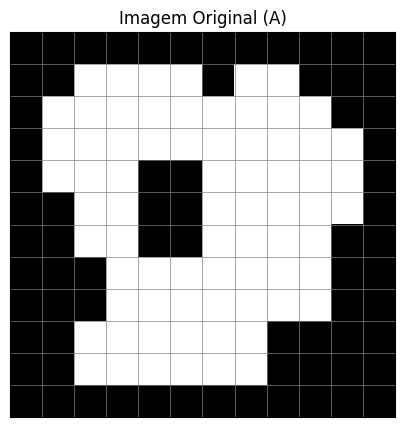

In [411]:
# Imagem binária (A)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))


# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax, "Imagem Original (A)")

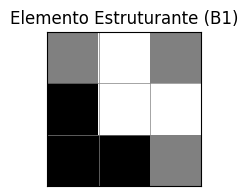

In [412]:
B1 = np.array([
    [0.5, 1, 0.5],
    [0, 1, 1],
    [0, 0, 0.5]
])

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(B1, ax, "Elemento Estruturante (B1)")

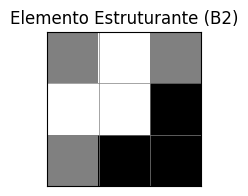

In [413]:
B2 = np.array([
    [0.5, 1, 0.5],
    [1, 1, 0],
    [0.5, 0, 0]
])

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(B2, ax, "Elemento Estruturante (B2)")

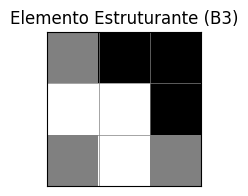

In [414]:
B3 = np.array([
    [0.5, 0, 0],
    [1, 1, 0],
    [0.5, 1, 0.5]
])

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(B3, ax, "Elemento Estruturante (B3)")

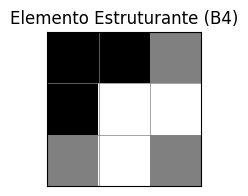

In [415]:
B4 = np.array([
    [0, 0, 0.5],
    [0, 1, 1],
    [0.5, 1, 0.5]
])

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(B4, ax, "Elemento Estruturante (B4)")

In [416]:
elementos_estruturantes = [B1, B2, B3, B4]

imagem_acerto_e_erro = manual_Acerto_e_Erro(image, elementos_estruturantes)

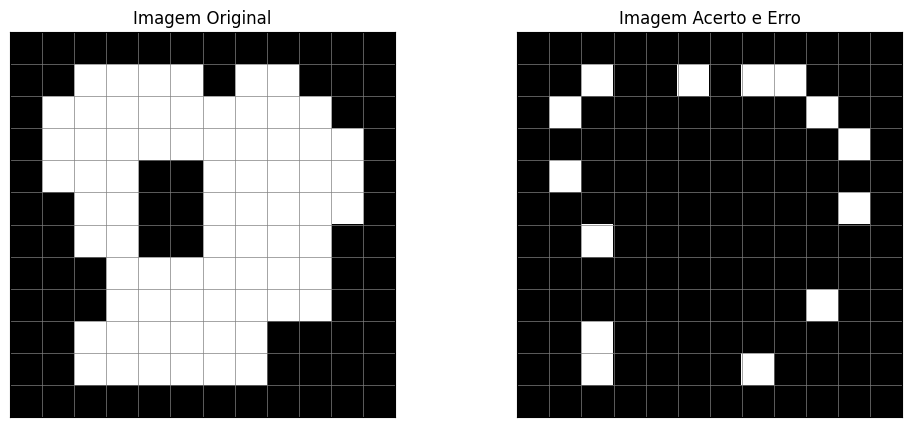

In [417]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(imagem_acerto_e_erro, ax[1], "Imagem Acerto e Erro")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

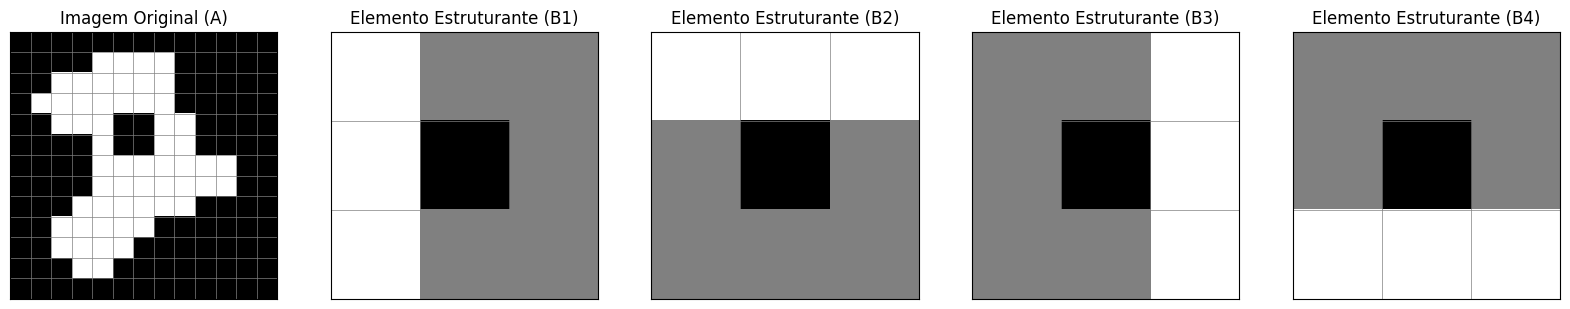

In [418]:
# Imagem binária (A)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

B1 = np.array([
    [1, 0.5, 0.5],
    [1, 0, 0.5],
    [1, 0.5, 0.5]
])

B2 = np.array([
    [1, 1, 1],
    [0.5, 0, 0.5],
    [0.5, 0.5, 0.5]
])

B3 = np.array([
    [0.5, 0.5, 1],
    [0.5, 0, 1],
    [0.5, 0.5, 1]
])

B4 = np.array([
    [0.5, 0.5, 0.5],
    [0.5, 0, 0.5],
    [1, 1, 1]
])



fig, ax = plt.subplots(1, 5, figsize=(20, 8))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax[0], "Imagem Original (A)")
mostrar_imagem_com_grid(B1, ax[1], "Elemento Estruturante (B1)")
mostrar_imagem_com_grid(B2, ax[2], "Elemento Estruturante (B2)")
mostrar_imagem_com_grid(B3, ax[3], "Elemento Estruturante (B3)")
mostrar_imagem_com_grid(B4, ax[4], "Elemento Estruturante (B4)")


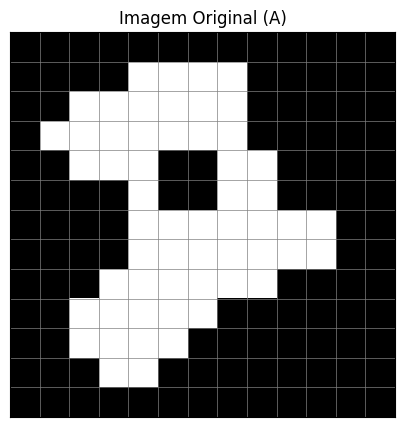

In [419]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax, "Imagem Original (A)")
# mostrar_imagem_com_grid(B1, ax, "Elemento Estruturante (B1)")
# mostrar_imagem_com_grid(B2, ax, "Elemento Estruturante (B2)")
# mostrar_imagem_com_grid(B3, ax, "Elemento Estruturante (B3)")
# mostrar_imagem_com_grid(B4, ax, "Elemento Estruturante (B4)")

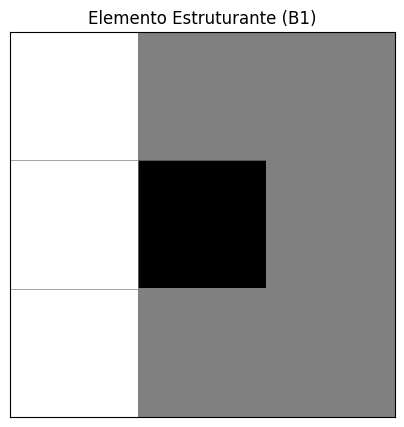

In [420]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax, "Imagem Original (A)")
mostrar_imagem_com_grid(B1, ax, "Elemento Estruturante (B1)")
# mostrar_imagem_com_grid(B2, ax, "Elemento Estruturante (B2)")
# mostrar_imagem_com_grid(B3, ax, "Elemento Estruturante (B3)")
# mostrar_imagem_com_grid(B4, ax, "Elemento Estruturante (B4)")

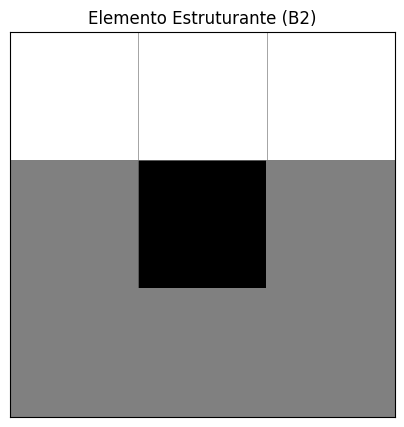

In [421]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax, "Imagem Original (A)")
# mostrar_imagem_com_grid(B1, ax, "Elemento Estruturante (B1)")
mostrar_imagem_com_grid(B2, ax, "Elemento Estruturante (B2)")
# mostrar_imagem_com_grid(B3, ax, "Elemento Estruturante (B3)")
# mostrar_imagem_com_grid(B4, ax, "Elemento Estruturante (B4)")

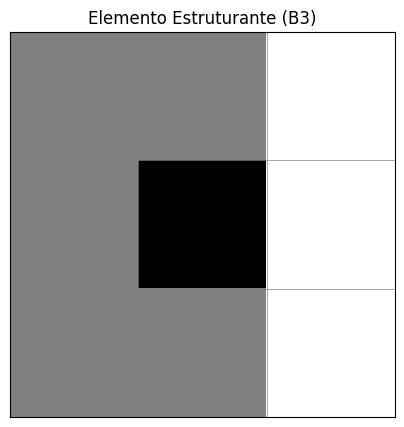

In [422]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax, "Imagem Original (A)")
# mostrar_imagem_com_grid(B1, ax, "Elemento Estruturante (B1)")
# mostrar_imagem_com_grid(B2, ax, "Elemento Estruturante (B2)")
mostrar_imagem_com_grid(B3, ax, "Elemento Estruturante (B3)")
# mostrar_imagem_com_grid(B4, ax, "Elemento Estruturante (B4)")

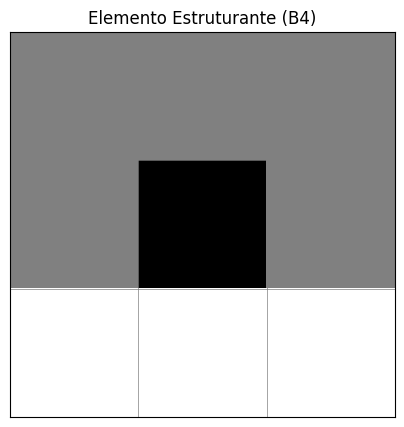

In [423]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax, "Imagem Original (A)")
# mostrar_imagem_com_grid(B1, ax, "Elemento Estruturante (B1)")
# mostrar_imagem_com_grid(B2, ax, "Elemento Estruturante (B2)")
# mostrar_imagem_com_grid(B3, ax, "Elemento Estruturante (B3)")
mostrar_imagem_com_grid(B4, ax, "Elemento Estruturante (B4)")

In [424]:
# Criar uma nova imagem para armazenar o resultado
fecho_convexo = np.zeros(image.shape)

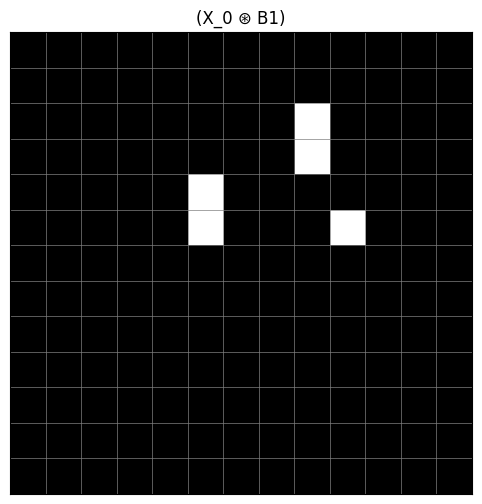

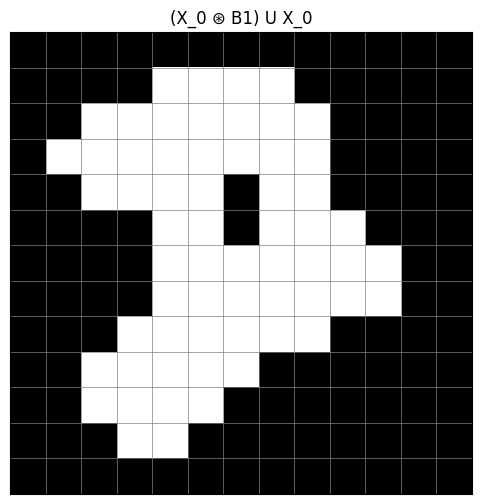

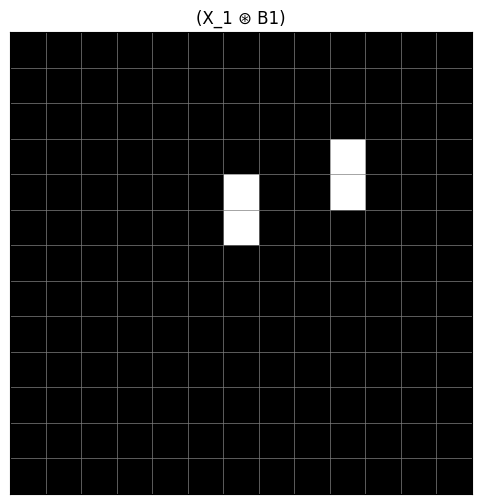

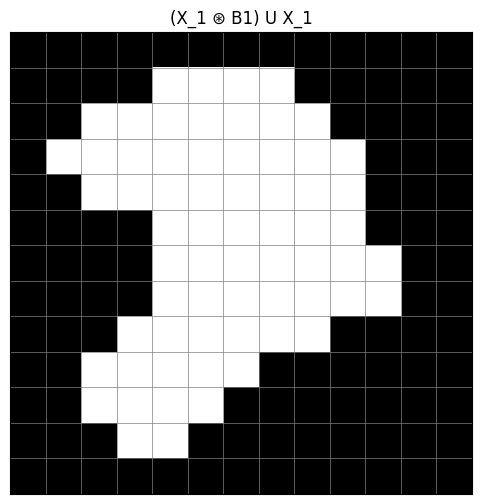

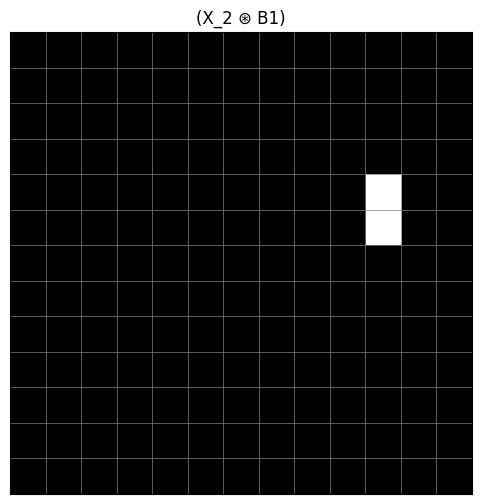

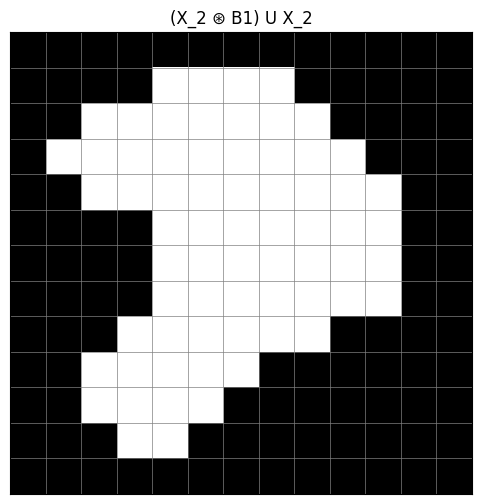

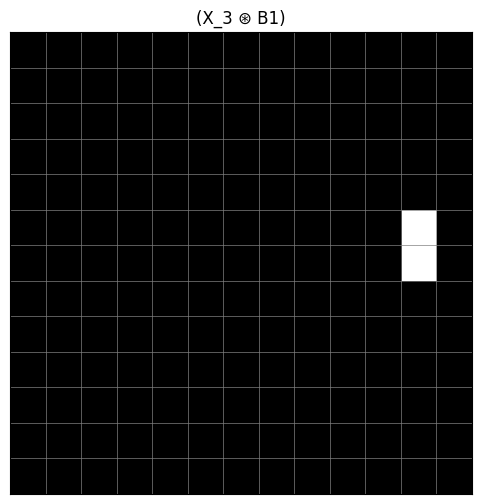

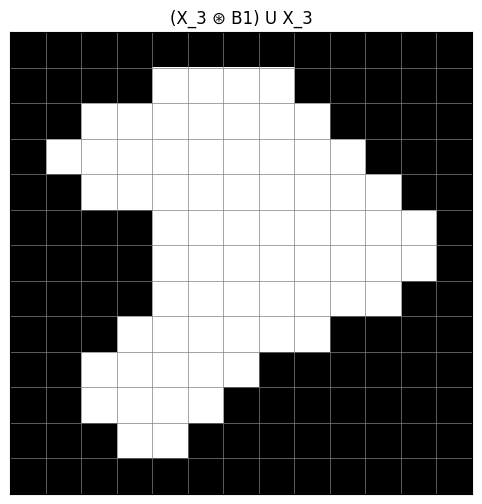

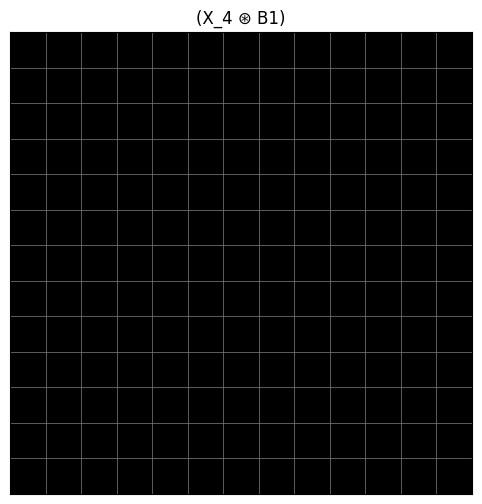

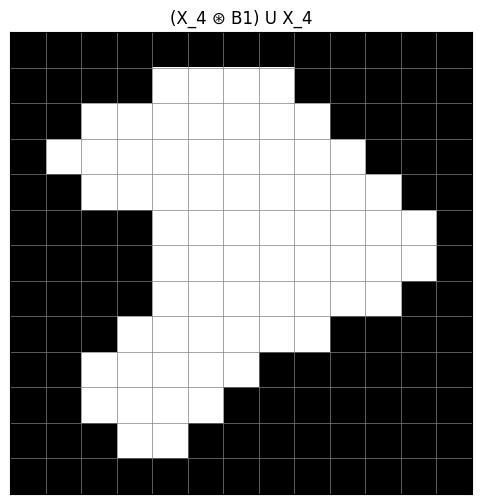

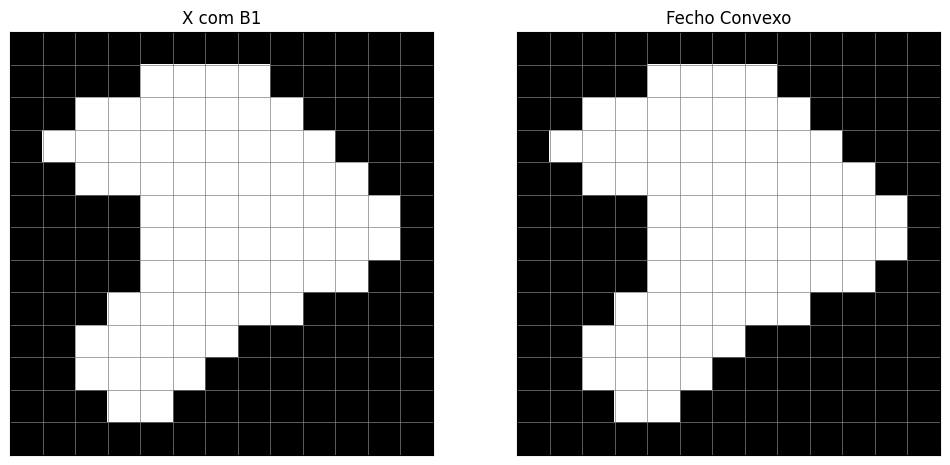

In [425]:
elementos_estruturantes = [B1]

# 1. Adicionando uma coluna no início e no fim, e uma linha acima e abaixo
antes = np.pad(image, pad_width=1, mode='constant', constant_values=0)

acerto_erro = manual_Acerto_e_Erro(antes, elementos_estruturantes)

imagem_finalizada = acerto_erro[1:-1, 1:-1]

cont = 0
vez = "(X_"+ str(cont) +" ⊛ B1)"
    
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

X = acerto_erro + antes

imagem_finalizada = X[1:-1, 1:-1]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

vez = "(X_"+ str(cont) +" ⊛ B1) U X_"+ str(cont)

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

cont = 1

while not np.array_equal(antes, X):  # Verifica se 'antes' e 'X' são diferentes
    
    antes = X  # Atualiza 'antes' com o último estado de 'X'
    X = manual_Acerto_e_Erro(antes, elementos_estruturantes)
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    vez = "(X_"+ str(cont) +" ⊛ B1)"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    X = X + antes
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    vez = "(X_"+ str(cont) +" ⊛ B1) U X_"+ str(cont)

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    cont += 1 

# 2. Removendo uma coluna no início e no fim, e uma linha acima e abaixo
# imagem_finalizada = X[1:-1, 1:-1]

fecho_convexo  = uniao(fecho_convexo, imagem_finalizada)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem")
mostrar_imagem_com_grid(imagem_finalizada, ax[0], "X com B1")
mostrar_imagem_com_grid(fecho_convexo, ax[1], "Fecho Convexo")

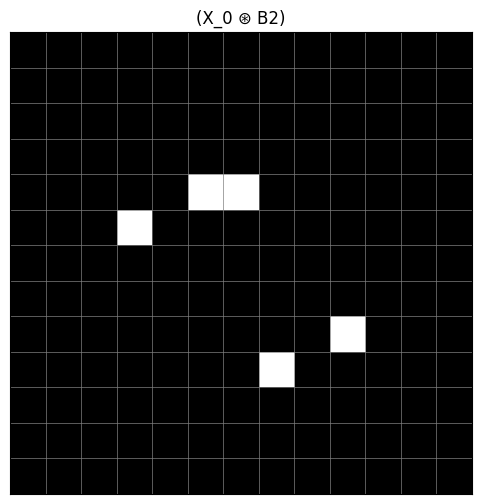

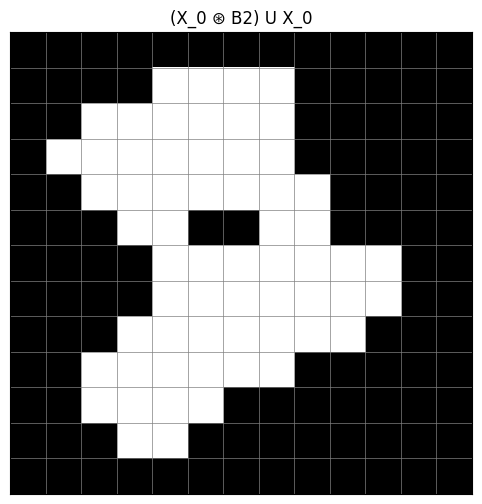

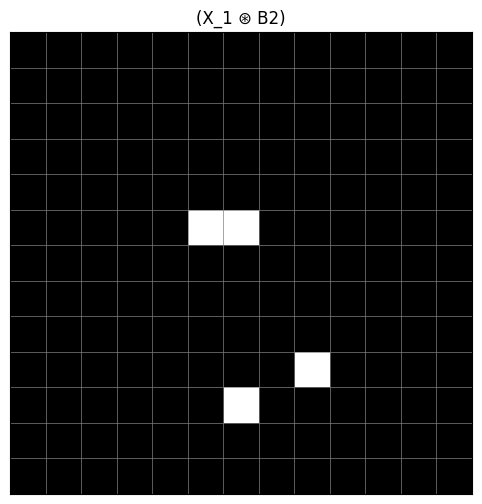

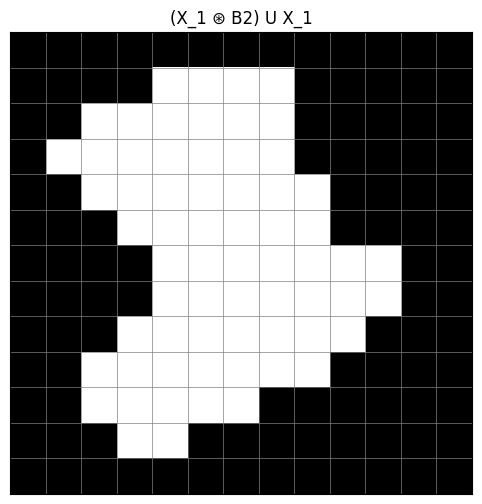

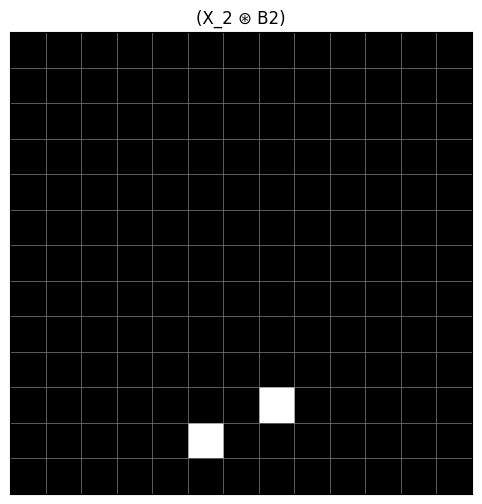

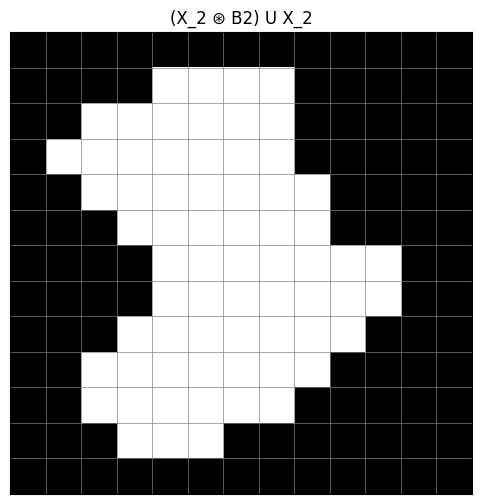

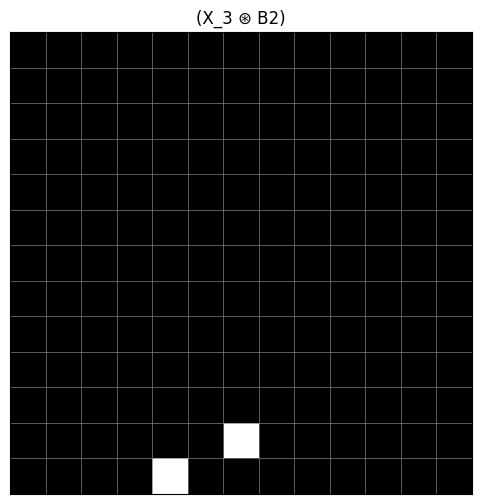

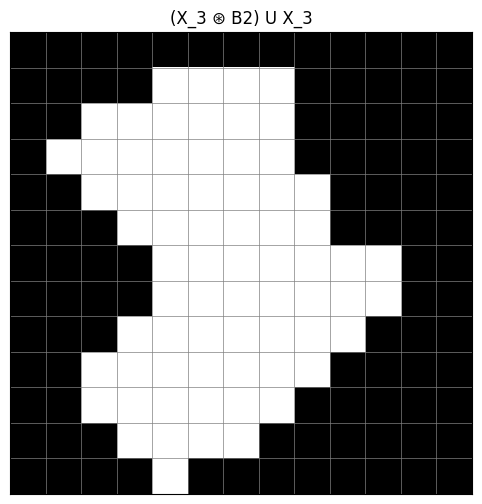

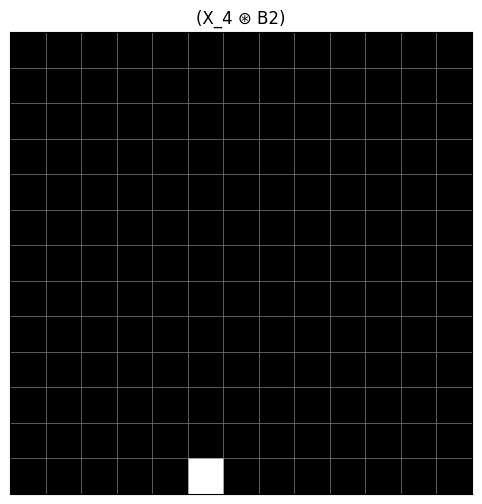

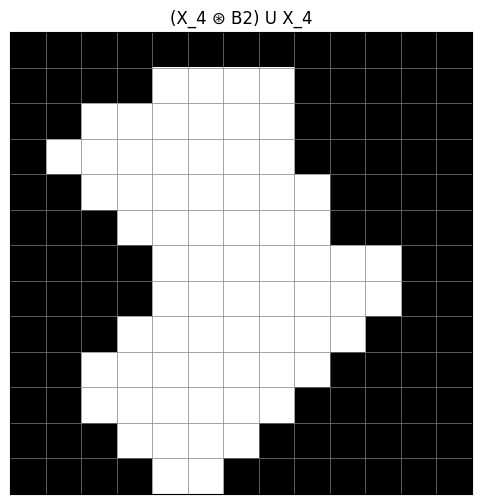

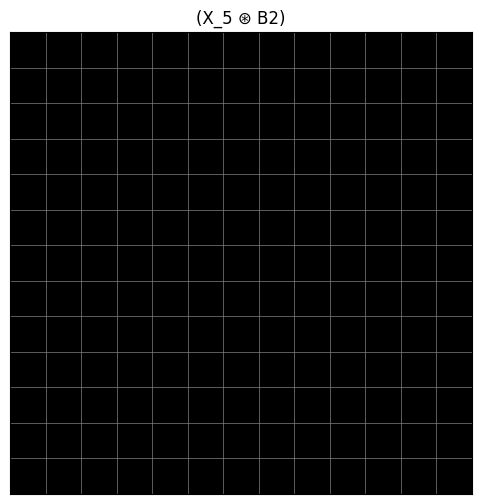

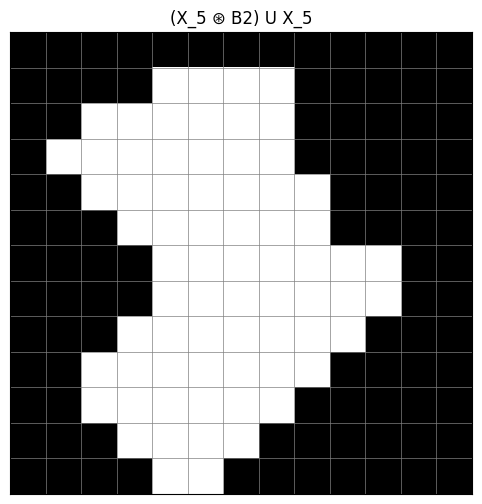

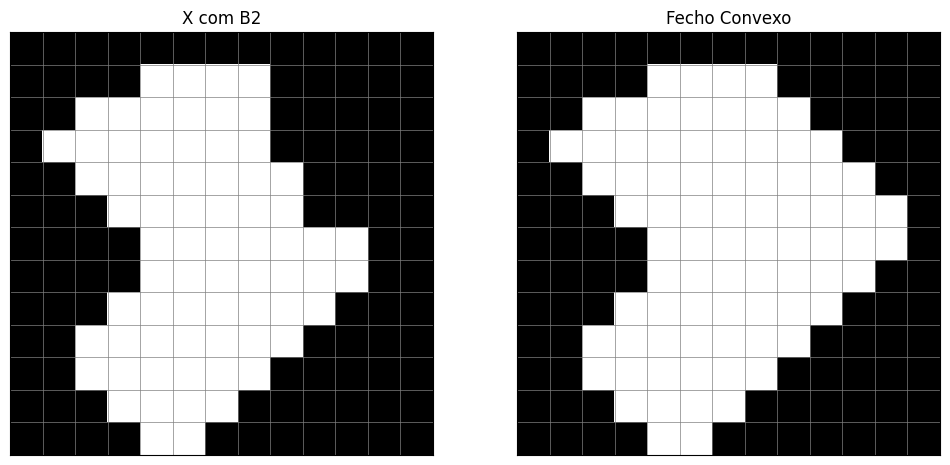

In [426]:
elementos_estruturantes = [B2]

# 1. Adicionando uma coluna no início e no fim, e uma linha acima e abaixo
antes = np.pad(image, pad_width=1, mode='constant', constant_values=0)

acerto_erro = manual_Acerto_e_Erro(antes, elementos_estruturantes)

imagem_finalizada = acerto_erro[1:-1, 1:-1]

cont = 0

vez = "(X_"+ str(cont) +" ⊛ B2)"
    
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

X = acerto_erro + antes

imagem_finalizada = X[1:-1, 1:-1]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

vez = "(X_"+ str(cont) +" ⊛ B2) U X_"+ str(cont)

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

cont = 1

while not np.array_equal(antes, X):  # Verifica se 'antes' e 'X' são diferentes
    
    antes = X  # Atualiza 'antes' com o último estado de 'X'
    X = manual_Acerto_e_Erro(antes, elementos_estruturantes)
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    vez = "(X_"+ str(cont) +" ⊛ B2)"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    X = X + antes
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    vez = "(X_"+ str(cont) +" ⊛ B2) U X_"+ str(cont)

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    cont += 1 

# 2. Removendo uma coluna no início e no fim, e uma linha acima e abaixo
# imagem_finalizada = X[1:-1, 1:-1]

fecho_convexo  = uniao(fecho_convexo, imagem_finalizada)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem")
mostrar_imagem_com_grid(imagem_finalizada, ax[0], "X com B2")
mostrar_imagem_com_grid(fecho_convexo, ax[1], "Fecho Convexo")

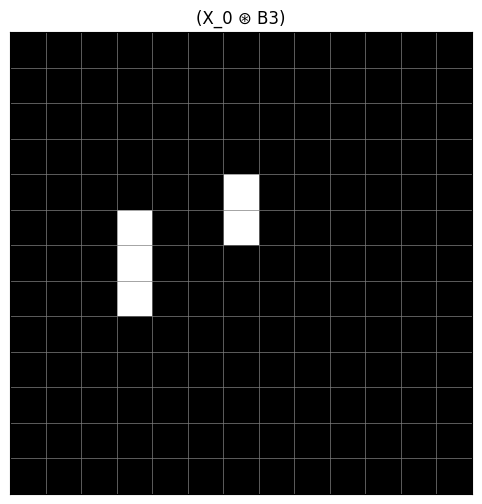

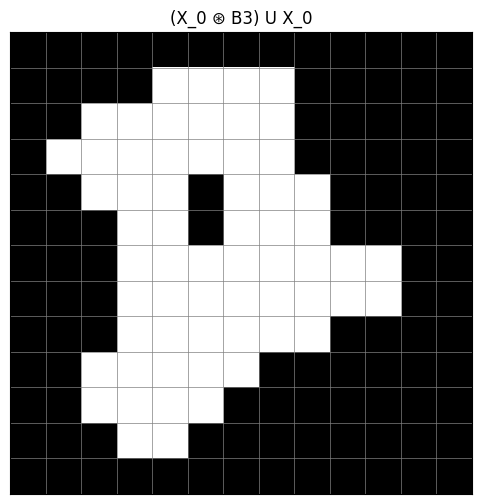

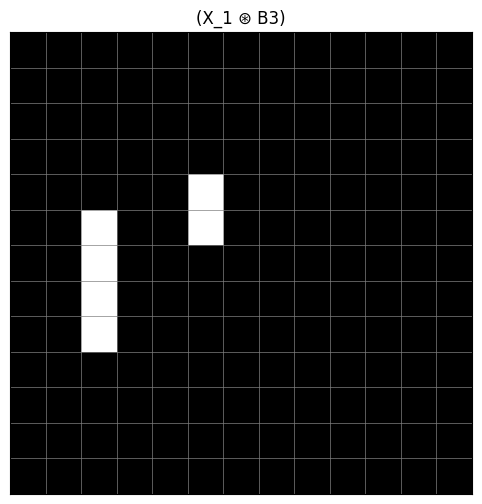

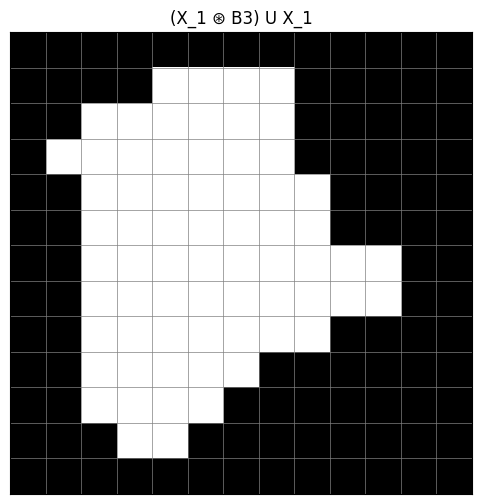

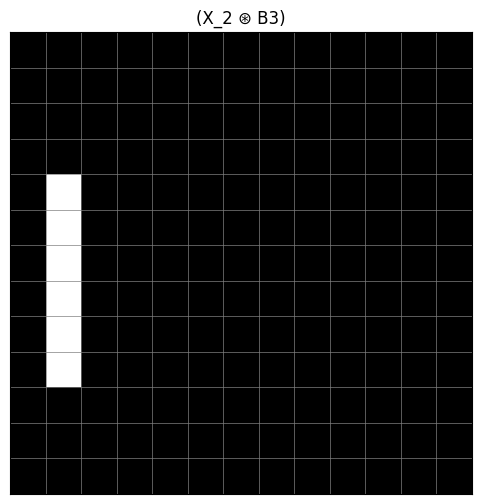

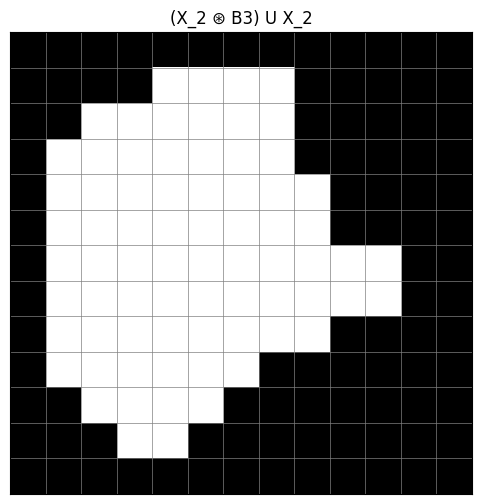

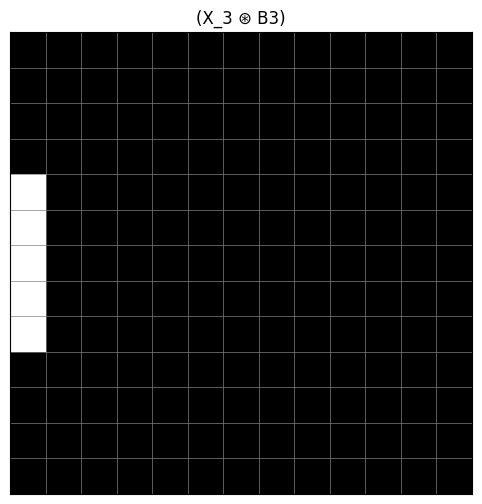

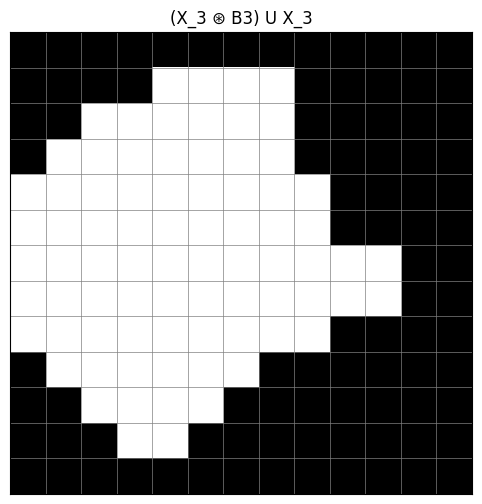

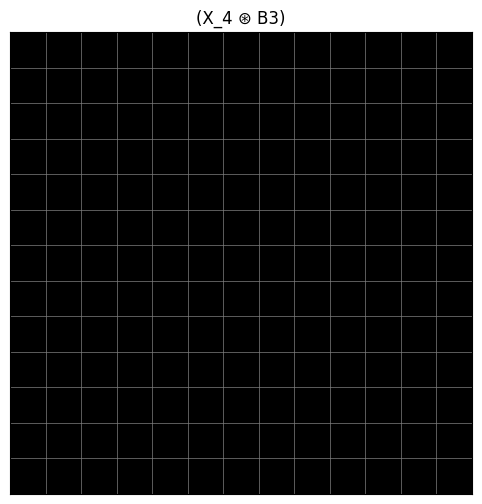

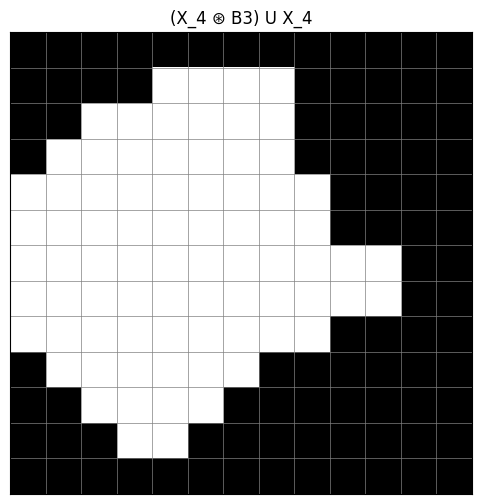

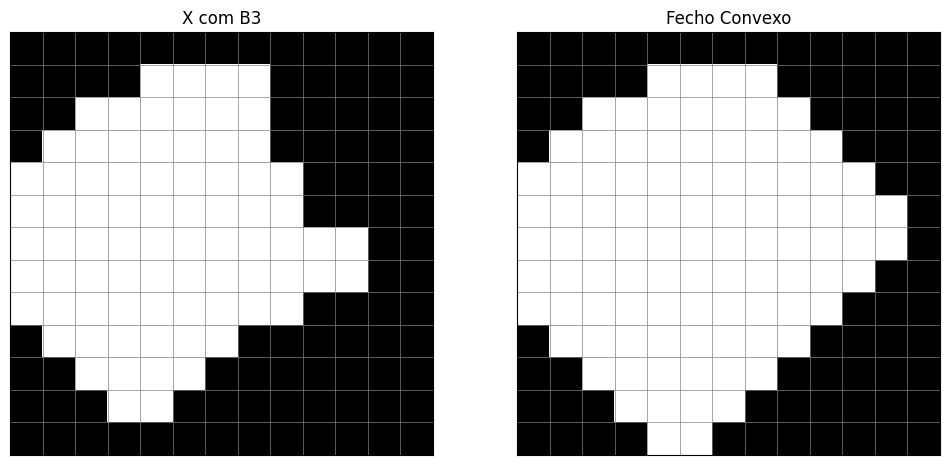

In [427]:
elementos_estruturantes = [B3]

# 1. Adicionando uma coluna no início e no fim, e uma linha acima e abaixo
antes = np.pad(image, pad_width=1, mode='constant', constant_values=0)

acerto_erro = manual_Acerto_e_Erro(antes, elementos_estruturantes)

imagem_finalizada = acerto_erro[1:-1, 1:-1]

cont = 0

vez = "(X_"+ str(cont) +" ⊛ B3)"
    
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

X = acerto_erro + antes

imagem_finalizada = X[1:-1, 1:-1]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

vez = "(X_"+ str(cont) +" ⊛ B3) U X_"+ str(cont)

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

cont = 1

while not np.array_equal(antes, X):  # Verifica se 'antes' e 'X' são diferentes
    
    antes = X  # Atualiza 'antes' com o último estado de 'X'
    X = manual_Acerto_e_Erro(antes, elementos_estruturantes)
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    vez = "(X_"+ str(cont) +" ⊛ B3)"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    X = X + antes
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    vez = "(X_"+ str(cont) +" ⊛ B3) U X_"+ str(cont)

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    cont += 1 

# 2. Removendo uma coluna no início e no fim, e uma linha acima e abaixo
# imagem_finalizada = X[1:-1, 1:-1]

fecho_convexo  = uniao(fecho_convexo, imagem_finalizada)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem")
mostrar_imagem_com_grid(imagem_finalizada, ax[0], "X com B3")
mostrar_imagem_com_grid(fecho_convexo, ax[1], "Fecho Convexo")

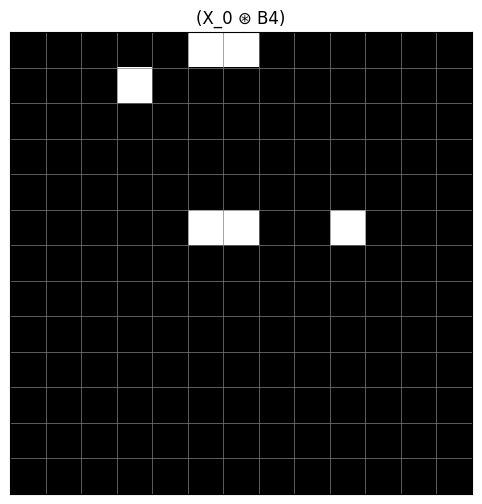

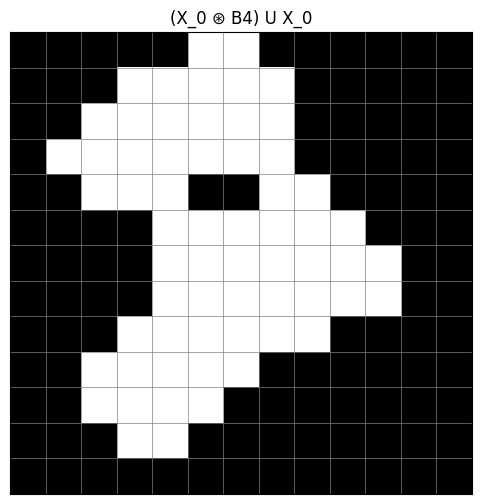

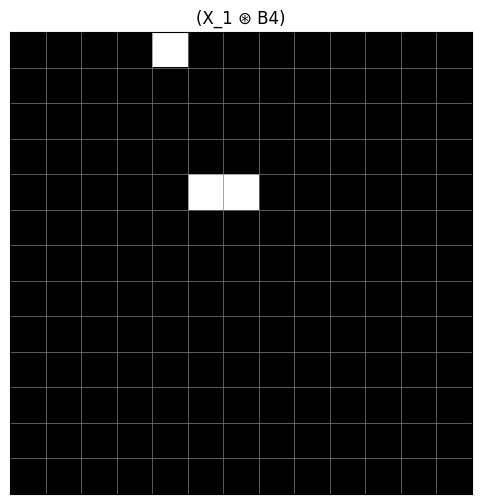

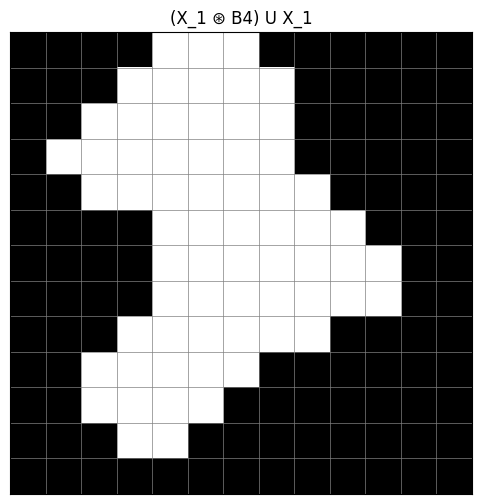

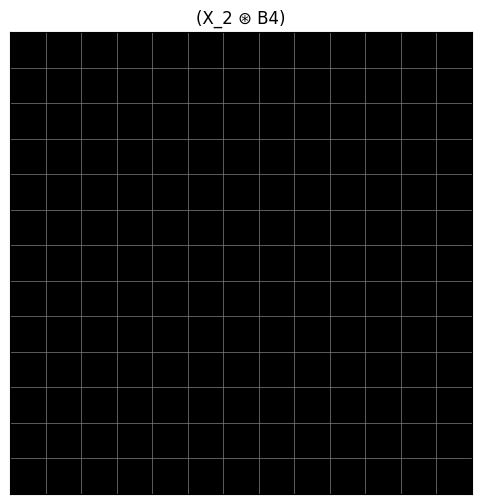

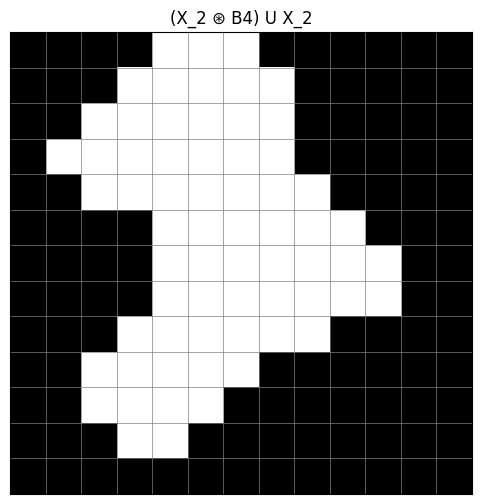

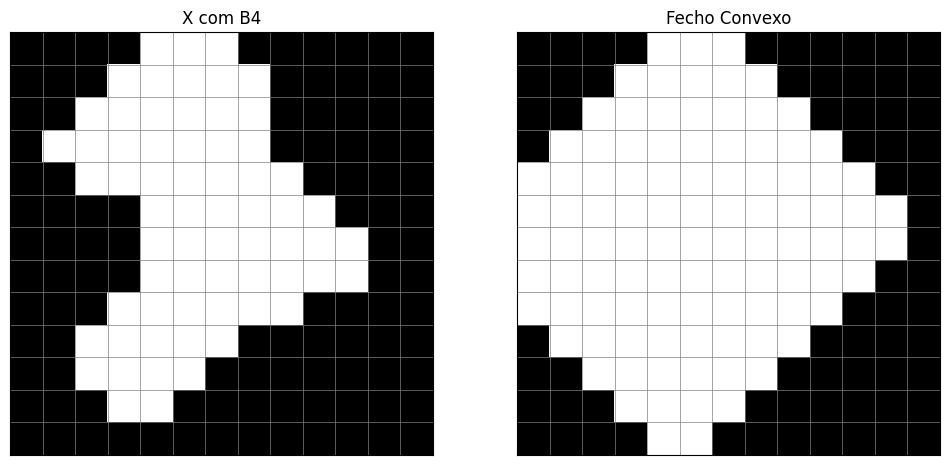

In [428]:
elementos_estruturantes = [B4]

# 1. Adicionando uma coluna no início e no fim, e uma linha acima e abaixo
antes = np.pad(image, pad_width=1, mode='constant', constant_values=0)

acerto_erro = manual_Acerto_e_Erro(antes, elementos_estruturantes)

imagem_finalizada = acerto_erro[1:-1, 1:-1]
    
cont = 0

vez = "(X_"+ str(cont) +" ⊛ B4)"
    
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

X = acerto_erro + antes

imagem_finalizada = X[1:-1, 1:-1]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

vez = "(X_"+ str(cont) +" ⊛ B4) U X_"+ str(cont)

mostrar_imagem_com_grid(imagem_finalizada, ax, vez)

cont = 1

while not np.array_equal(antes, X):  # Verifica se 'antes' e 'X' são diferentes
    
    antes = X  # Atualiza 'antes' com o último estado de 'X'
    X = manual_Acerto_e_Erro(antes, elementos_estruturantes)
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    vez = "(X_"+ str(cont) +" ⊛ B4)"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    X = X + antes
    
    imagem_finalizada = X[1:-1, 1:-1]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    vez = "(X_"+ str(cont) +" ⊛ B4) U X_"+ str(cont)

    mostrar_imagem_com_grid(imagem_finalizada, ax, vez)
    
    cont += 1 

# 2. Removendo uma coluna no início e no fim, e uma linha acima e abaixo
# imagem_finalizada = X[1:-1, 1:-1]

fecho_convexo  = uniao(fecho_convexo, imagem_finalizada)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem")
mostrar_imagem_com_grid(imagem_finalizada, ax[0], "X com B4")
mostrar_imagem_com_grid(fecho_convexo, ax[1], "Fecho Convexo")

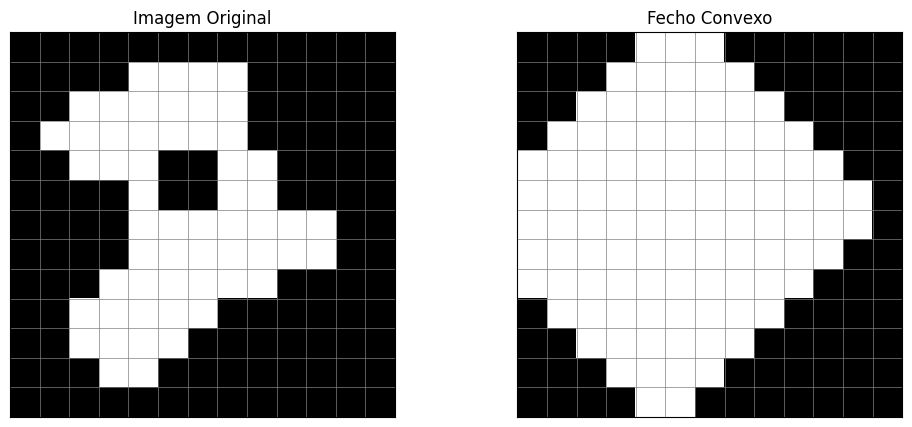

In [429]:
elementos_estruturantes = [B1, B2, B3, B4]

fecho = manual_fecho_convexos(image, elementos_estruturantes)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(fecho, ax[1], "Fecho Convexo")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

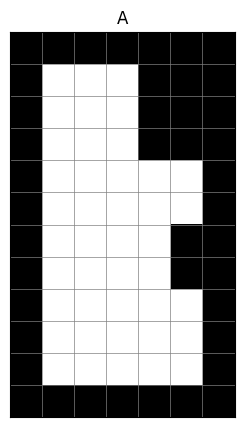

In [430]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

B1 = np.array([
    [1, 1, 1],
    [0.5, 1, 0.5],
    [0, 0, 0]
])

B2 = np.array([
    [0.5, 0, 0],
    [1, 1, 0],
    [1, 1, 0.5]
])

B3 = np.array([
    [0, 0.5, 1],
    [0, 1, 1],
    [0, 0.5, 1]
])

B4 = np.array([
    [1, 1, 0.5],
    [1, 1, 0],
    [0.5, 0, 0]
])

B5 = np.array([
    [0, 0, 0],
    [0.5, 1, 0.5],
    [1, 1, 1]
])

B6 = np.array([
    [0.5, 1, 1],
    [0, 1, 1],
    [0, 0, 0.5]
])

B7 = np.array([
    [1, 0.5, 0],
    [1, 1, 0],
    [1, 0.5, 0]
])

B8 = np.array([
    [0, 0, 0.5],
    [0, 1, 1],
    [0.5, 1, 1]
])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax, "A")

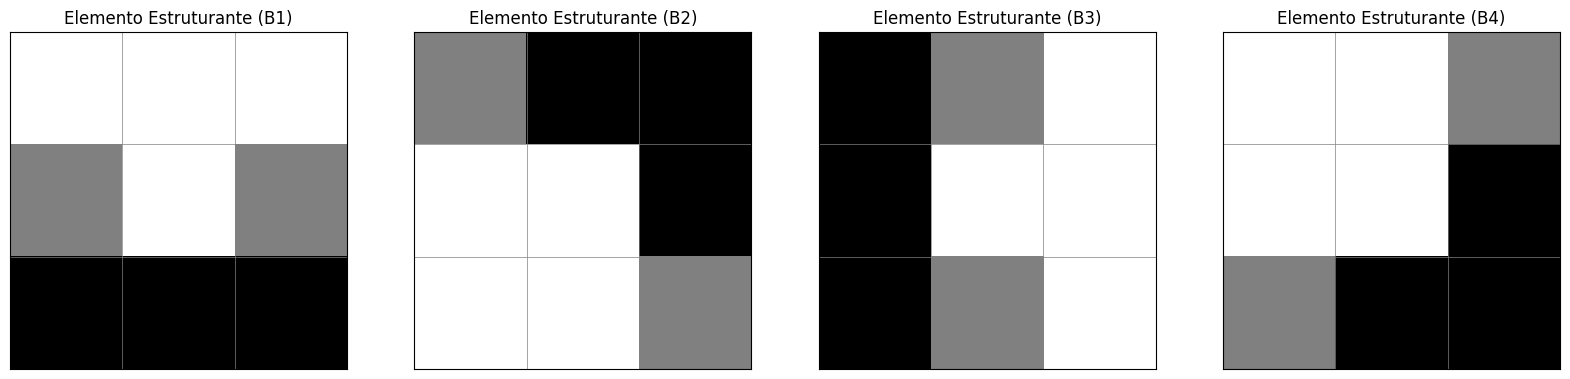

In [431]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(B1, ax[0], "Elemento Estruturante (B1)")
mostrar_imagem_com_grid(B2, ax[1], "Elemento Estruturante (B2)")
mostrar_imagem_com_grid(B3, ax[2], "Elemento Estruturante (B3)")
mostrar_imagem_com_grid(B4, ax[3], "Elemento Estruturante (B4)")

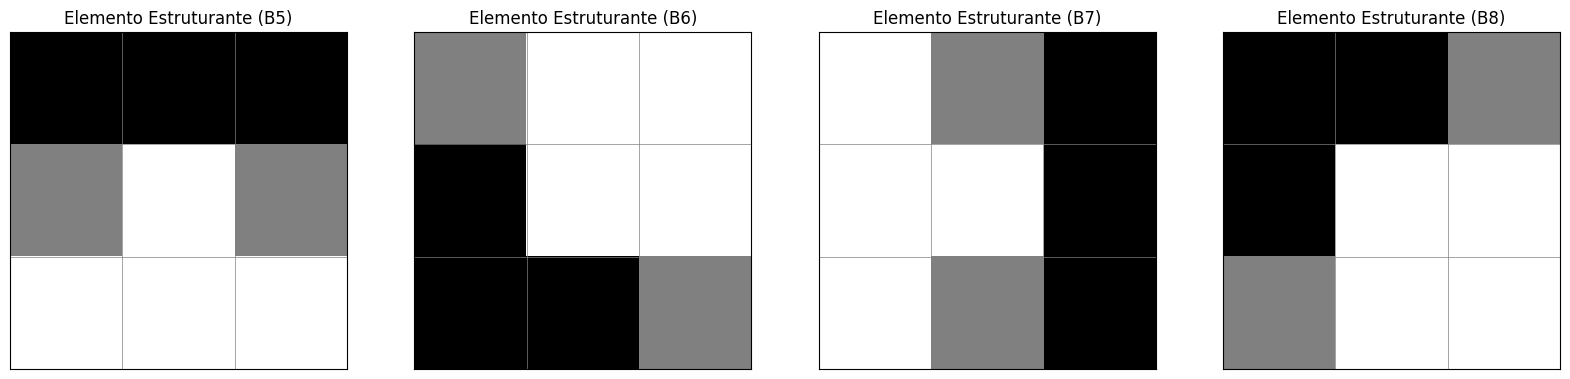

In [432]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(B5, ax[0], "Elemento Estruturante (B5)")
mostrar_imagem_com_grid(B6, ax[1], "Elemento Estruturante (B6)")
mostrar_imagem_com_grid(B7, ax[2], "Elemento Estruturante (B7)")
mostrar_imagem_com_grid(B8, ax[3], "Elemento Estruturante (B8)")

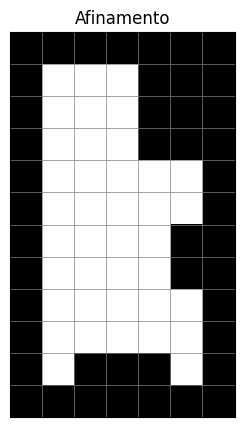

In [433]:
# elementos_estruturantes = [B1, B2, B3, B4, B5, B6, B7, B8]
elementos_estruturantes = [B1]
acerto_erro = manual_Acerto_e_Erro(image, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = image - interseccao(image, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

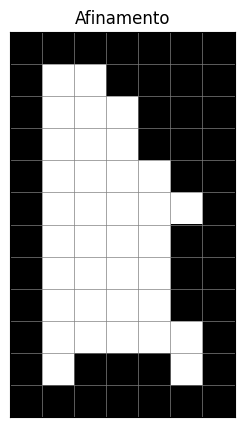

In [434]:
elementos_estruturantes = [B2]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

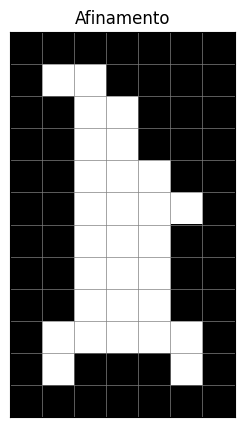

In [435]:
elementos_estruturantes = [B3]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

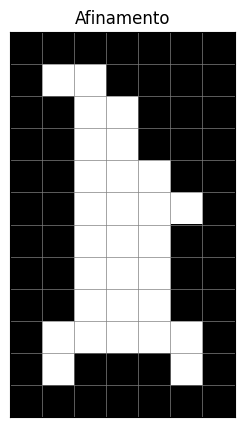

In [436]:
elementos_estruturantes = [B4]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

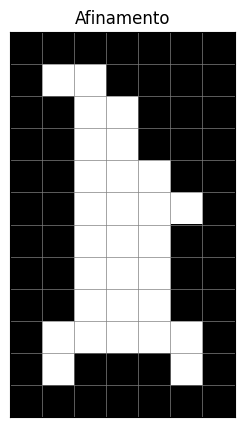

In [437]:
elementos_estruturantes = [B5]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

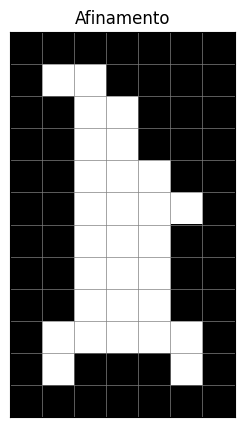

In [438]:
elementos_estruturantes = [B6]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

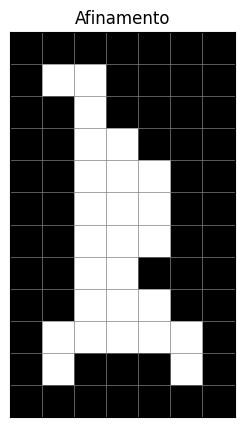

In [439]:
elementos_estruturantes = [B7]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

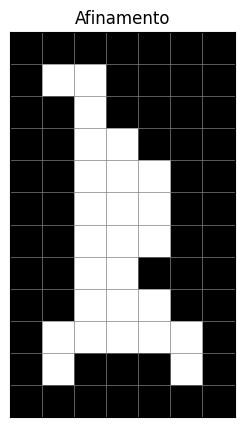

In [440]:
elementos_estruturantes = [B8]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

## Segunda Vez

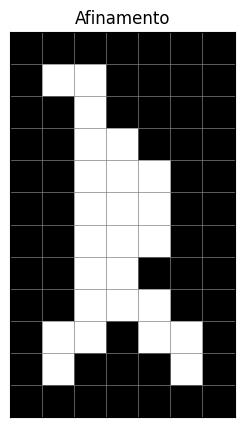

In [441]:
# elementos_estruturantes = [B1, B2, B3, B4, B5, B6, B7, B8]
elementos_estruturantes = [B1]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

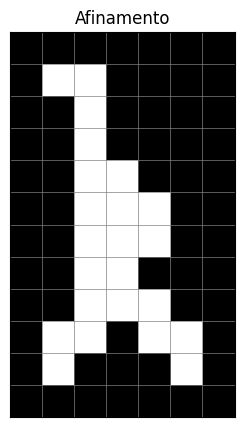

In [442]:
elementos_estruturantes = [B2]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

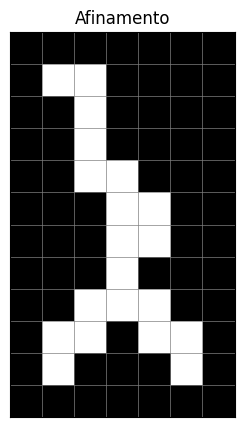

In [443]:
elementos_estruturantes = [B3]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

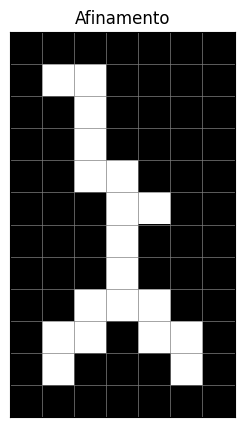

In [444]:
elementos_estruturantes = [B4]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

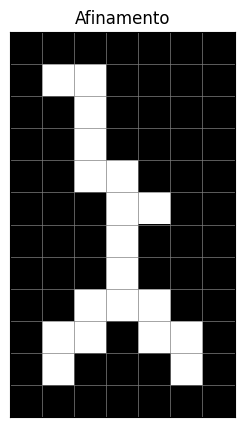

In [445]:
elementos_estruturantes = [B5]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

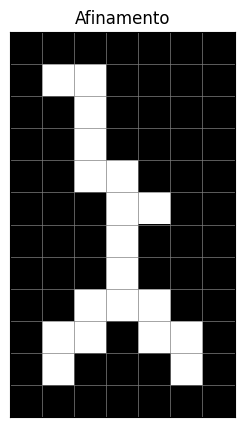

In [446]:
elementos_estruturantes = [B6]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

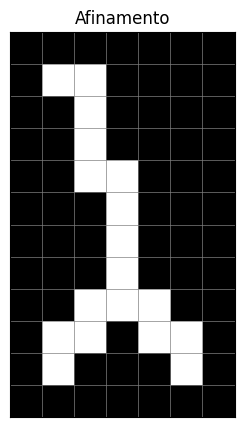

In [447]:
elementos_estruturantes = [B7]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")

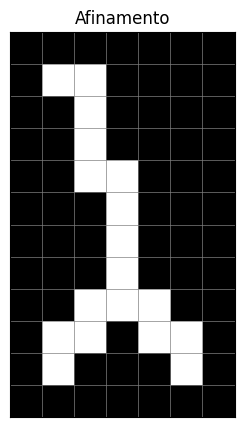

In [448]:
elementos_estruturantes = [B8]
acerto_erro = manual_Acerto_e_Erro(resultado, elementos_estruturantes)
complemento = 1 - acerto_erro
resultado = resultado - interseccao(resultado, acerto_erro)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(resultado, ax, "Afinamento")